In [1]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm


In [2]:
path = 'data'

In [3]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [4]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]
images

['data\\agri_0_1009.jpeg',
 'data\\agri_0_1017.jpeg',
 'data\\agri_0_1018.jpeg',
 'data\\agri_0_1020.jpeg',
 'data\\agri_0_1024.jpeg',
 'data\\agri_0_1026.jpeg',
 'data\\agri_0_1028.jpeg',
 'data\\agri_0_1041.jpeg',
 'data\\agri_0_1053.jpeg',
 'data\\agri_0_106.jpeg',
 'data\\agri_0_1068.jpeg',
 'data\\agri_0_1079.jpeg',
 'data\\agri_0_1082.jpeg',
 'data\\agri_0_1083.jpeg',
 'data\\agri_0_1094.jpeg',
 'data\\agri_0_1095.jpeg',
 'data\\agri_0_110.jpeg',
 'data\\agri_0_1114.jpeg',
 'data\\agri_0_1119.jpeg',
 'data\\agri_0_1123.jpeg',
 'data\\agri_0_1129.jpeg',
 'data\\agri_0_113.jpeg',
 'data\\agri_0_1130.jpeg',
 'data\\agri_0_114.jpeg',
 'data\\agri_0_1140.jpeg',
 'data\\agri_0_1146.jpeg',
 'data\\agri_0_1166.jpeg',
 'data\\agri_0_1168.jpeg',
 'data\\agri_0_1171.jpeg',
 'data\\agri_0_1173.jpeg',
 'data\\agri_0_1174.jpeg',
 'data\\agri_0_1177.jpeg',
 'data\\agri_0_1192.jpeg',
 'data\\agri_0_1193.jpeg',
 'data\\agri_0_1198.jpeg',
 'data\\agri_0_1210.jpeg',
 'data\\agri_0_1211.jpeg',
 'dat

In [5]:
len(images)

1300

In [6]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

In [7]:
len(labels)

1300

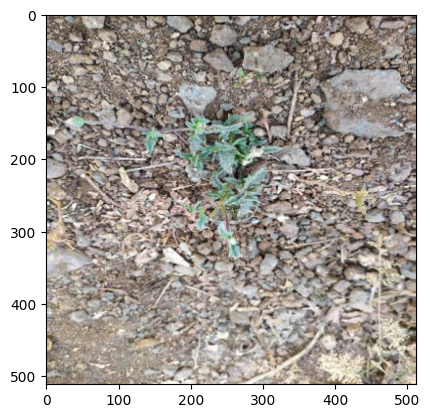

In [8]:
plt.imshow(cv2.cvtColor(cv2.imread(images[200]),cv2.COLOR_BGR2RGB));

Create an Empty DataFrame:

1. A DataFrame named df is initialized with specific columns: image_name, object, x_cen, y_cen, w, and h.
Iterate Over Images:

2. A loop iterates over a list called images, which contains the names of the image files.
Open and Read Label Files:

3. For each image id, the code opens a corresponding text file (with the same name but a .txt extension) to read the labels associated with that image.
The label file is read entirely into a string a, which is then split into individual lines, creating a list called label.
The last element (which is likely an empty string due to the final newline character) is removed from the label list to form cleaned_label.
Extract Label Data:

4. For each entry (line) in cleaned_label, it splits the string into parts based on spaces.
It expects each line to contain values in a specific format:
The first value is an integer representing the object class.
The next four values are floating-point numbers representing the center coordinates (x_cen, y_cen) and dimensions (w, h) of the bounding box around the object.
5. Populate the DataFrame:

For each extracted value, a new row is added to the DataFrame:
The image_name is derived from the original id, excluding the first 5 characters (likely to remove a path or prefix).
The object class and coordinates are converted to the appropriate data types (int for the object class, floats for the coordinates and dimensions).
The index i is incremented for each entry to ensure that new rows are added correctly.

6. Final Structure:

After processing all images, df will contain a structured representation of all objects detected in the images, with their corresponding coordinates and dimensions.


In [9]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    label = open(id[:-5]+'.txt','r') 
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]
    
    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = id[5:]
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1

100%|█████████████████████████████████████████████████████████████████████████████| 1300/1300 [00:01<00:00, 980.01it/s]


The line label = open(id[:-5]+'.txt','r') does the following:

Open a File: It opens a text file for reading.

File Name Construction:

id is a string that represents the name of an image file (e.g., "image1.jpg").
id[:-5] removes the last five characters from the id string. This is often done to strip the file extension (like .jpg) from the name, resulting in just "image1".
id[:-5] + '.txt' then adds the .txt extension to this name, creating the filename for the label file (e.g., "image1.txt").
File Mode: The 'r' argument specifies that the file is opened in "read" mode, meaning you can read its contents but not modify it.



The line label = a.split('\n') does the following:

Splitting a String: It takes the string a (which contains the entire content of a label file) and splits it into a list of lines.

Delimiter: The '\n' is the newline character, which indicates the end of a line in a text file. By using this character as a delimiter, the split() method creates a new element in the list for each line in the string.

Example:
If a contains:

0 0.5 0.5 1.0 2.0
1 0.4 0.6 0.9 1.8
After executing label = a.split('\n'), the variable label will be:

['0 0.5 0.5 1.0 2.0', '1 0.4 0.6 0.9 1.8', '']
(Note: The last element is an empty string due to a trailing newline at the end of the file.)


In [10]:
len(df)

2072

In [11]:
column_name = ['filename', 'width', 'height', 'x_cen', 'y_cen', 'name', 'xmin', 'ymin', 'xmax', 'ymax', 'w', 'h']

In [12]:
df.head()

,image_name,object,x_cen,y_cen,w,h
0,agri_0_1009.jpeg,1,0.608398,0.498047,0.541016,0.53125
1,agri_0_1017.jpeg,1,0.496094,0.384766,0.960938,0.753906
2,agri_0_1018.jpeg,1,0.445312,0.483398,0.808594,0.634766
3,agri_0_1020.jpeg,1,0.494141,0.350586,0.730469,0.611328
4,agri_0_1024.jpeg,1,0.601562,0.448242,0.570312,0.595703


In [13]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):
    
    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512  
    pascal_voc.loc[i,'x_cen'] = int(df.loc[i, 'x_cen'] * 512)
    pascal_voc.loc[i,'y_cen'] = int(df.loc[i, 'y_cen'] * 512)
    if df.loc[i,'object'] == 0:    
        pascal_voc.loc[i,'name'] = 'crop'
    else:
        pascal_voc.loc[i,'name'] = 'weed'
        
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512) 
    pascal_voc.loc[i,'w'] = int(df.loc[i, 'w'] * 512)
    pascal_voc.loc[i,'h'] = int(df.loc[i, 'h'] * 512)

100%|████████████████████████████████████████████████████████████████████████████| 2072/2072 [00:01<00:00, 1250.44it/s]


1. Create an Empty DataFrame:

pascal_voc is initialized with specific columns defined by column_name.


2. Loop Through Each Entry:

It iterates over each row of the DataFrame df using a progress bar (tqdm) for visual feedback.



3. Populate Columns:

For each entry, the following information is filled into the pascal_voc DataFrame:
Filename: The name of the image is taken from df and assigned to the filename column.
Width and Height: Both are set to 512 pixels, which is a common size for images in this format.
Class: Based on the value in df['object'], the code assigns a class label:
If object is 0, the class is set to 'crop'.
Otherwise, it is set to 'weed'.



4. Calculate Bounding Box Coordinates:

The code calculates the bounding box coordinates (xmin, ymin, xmax, ymax) based on the center coordinates (x_cen, y_cen) and dimensions (w, h) from df:
xmin is calculated by subtracting half the width from the center x-coordinate and then scaling it to the image size (512 pixels).
ymin is calculated similarly using the height.
xmax adds half the width to the center x-coordinate.
ymax adds half the height to the center y-coordinate.
All these coordinates are converted to integers.

In [14]:
pascal_voc

,filename,width,height,x_cen,y_cen,name,xmin,ymin,xmax,ymax,w,h
0,agri_0_1009.jpeg,512,512,311,255,weed,172,119,449,391,277,272
1,agri_0_1017.jpeg,512,512,254,197,weed,8,4,500,390,492,385
2,agri_0_1018.jpeg,512,512,227,247,weed,20,84,434,409,414,325
3,agri_0_1020.jpeg,512,512,253,179,weed,66,23,440,336,374,312
4,agri_0_1024.jpeg,512,512,307,229,weed,161,76,453,381,291,304
...,...,...,...,...,...,...,...,...,...,...,...,...
2067,agri_0_9963.jpeg,512,512,256,208,weed,58,80,455,336,396,256
2068,agri_0_9971.jpeg,512,512,136,222,weed,45,132,228,311,183,178
2069,agri_0_9971.jpeg,512,512,139,433,weed,52,355,227,512,175,157
2070,agri_0_9971.jpeg,512,512,365,195,weed,272,80,458,310,186,230


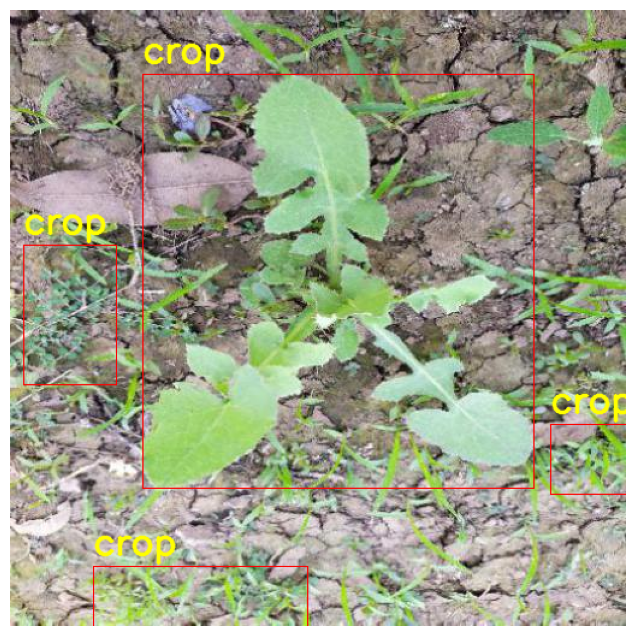

In [15]:
any_index_number = 20  #change this number for different images
image_path = os.path.join(path, pascal_voc.loc[any_index_number, 'filename'])
img = cv2.imread(image_path)
test_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
for i in range(len(test_df)):
    
    rec = cv2.rectangle(test_image, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1) 
    text = cv2.putText(rec, test_df.loc[i,'name'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(8,8))    
plt.imshow(text)
plt.axis('off')
plt.show()

1. Select an Image:

any_index_number = 20: This variable sets which image to visualize (you can change this number to see different images).
image_path: Constructs the full path to the image file by joining a base path with the filename from the pascal_voc DataFrame for the selected index.



2. Read and Prepare the Image:

img = cv2.imread(image_path): Loads the image from the specified path using OpenCV.
test_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB): Converts the image from BGR (OpenCV’s default format) to RGB for proper display in matplotlib.



3. Filter DataFrame for the Selected Image:

test_df: Filters the pascal_voc DataFrame to include only the entries for the selected image, resetting the index for easier iteration.


4. Draw Bounding Boxes and Labels:

A loop iterates over the filtered test_df:
cv2.rectangle(): Draws a rectangle on the image based on the bounding box coordinates (xmin, ymin, xmax, ymax) for each detected object. The rectangle is colored blue (255, 0, 0) with a thickness of 1 pixel.
cv2.putText(): Adds the class label above the rectangle. The label is colored yellow (255, 255, 0) and displayed in a specific font.


5. Display the Image:

plt.figure(figsize=(8,8)): Sets the figure size for displaying the image.
plt.imshow(text): Displays the image with bounding boxes and labels.
plt.axis('off'): Hides the axis for a cleaner look.
plt.show(): Renders the image in the output.

In [16]:
pascal_voc.to_csv('pascal_voc_format.csv',index=False)

In [17]:
df = pd.read_csv(r"pascal_voc_format.csv")

In [18]:
df

,filename,width,height,x_cen,y_cen,name,xmin,ymin,xmax,ymax,w,h
0,agri_0_1009.jpeg,512,512,311,255,weed,172,119,449,391,277,272
1,agri_0_1017.jpeg,512,512,254,197,weed,8,4,500,390,492,385
2,agri_0_1018.jpeg,512,512,227,247,weed,20,84,434,409,414,325
3,agri_0_1020.jpeg,512,512,253,179,weed,66,23,440,336,374,312
4,agri_0_1024.jpeg,512,512,307,229,weed,161,76,453,381,291,304
...,...,...,...,...,...,...,...,...,...,...,...,...
2067,agri_0_9963.jpeg,512,512,256,208,weed,58,80,455,336,396,256
2068,agri_0_9971.jpeg,512,512,136,222,weed,45,132,228,311,183,178
2069,agri_0_9971.jpeg,512,512,139,433,weed,52,355,227,512,175,157
2070,agri_0_9971.jpeg,512,512,365,195,weed,272,80,458,310,186,230


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2072 non-null   object
 1   width     2072 non-null   int64 
 2   height    2072 non-null   int64 
 3   x_cen     2072 non-null   int64 
 4   y_cen     2072 non-null   int64 
 5   name      2072 non-null   object
 6   xmin      2072 non-null   int64 
 7   ymin      2072 non-null   int64 
 8   xmax      2072 non-null   int64 
 9   ymax      2072 non-null   int64 
 10  w         2072 non-null   int64 
 11  h         2072 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 194.4+ KB


In [20]:
df.describe()

,width,height,x_cen,y_cen,xmin,ymin,xmax,ymax,w,h
count,2072.0,2072.0,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000
mean,512.0,512.0,257.817568,251.711390,127.453668,133.679054,388.246622,369.800193,260.313707,235.652510
std,0.0,0.0,87.925781,87.180603,119.281819,109.780514,118.164207,116.588546,159.528467,144.481139
min,512.0,512.0,17.000000,19.000000,0.000000,0.000000,34.000000,33.000000,21.000000,18.000000
25%,512.0,512.0,227.000000,217.750000,35.000000,50.000000,332.000000,312.000000,92.750000,97.000000
50%,512.0,512.0,257.000000,256.000000,88.000000,111.000000,424.000000,399.000000,284.000000,240.000000
75%,512.0,512.0,289.000000,288.000000,188.000000,184.000000,478.000000,460.000000,400.000000,345.000000
max,512.0,512.0,499.000000,494.000000,488.000000,480.000000,512.000000,512.000000,511.000000,511.000000


1. Set Up a Grid for Display:

axes = plt.subplots(46, 46, figsize=(100, 100)): Creates a grid of subplots with 46 rows and 46 columns. The figure size is set to 100 by 100 inches, which is quite large, allowing for many images to be displayed.


2. Loop Through Images:

for i, ax in tqdm(zip(range(2072), axes.flat)): This loop iterates over the first 2072 images (based on your dataset). It uses tqdm to provide a progress bar as it processes the images. Each iteration gives you an index i and a corresponding axis ax from the grid.


3. Filter DataFrame for the Current Image:

temp_df = df[df['filename'] == pascal_voc.loc[i, 'filename']].reset_index(drop=True): Filters the original DataFrame df to get only the rows corresponding to the current image's filename.


4. Read and Prepare the Image:

image_path = os.path.join(path, pascal_voc.loc[i, 'filename']): Constructs the full path to the current image.
img = cv2.imread(image_path): Reads the image using OpenCV.
temp_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB): Converts the image from BGR to RGB for proper display with matplotlib.


5. Draw Bounding Boxes and Labels:

A nested loop iterates over the entries in temp_df:
cv2.rectangle(): Draws rectangles on the image using the bounding box coordinates (xmin, ymin, xmax, ymax). The rectangles are colored blue with a thickness of 2 pixels.
cv2.putText(): Adds the class label above each rectangle, colored yellow.


6. Display in the Grid:

ax.imshow(rect_text): Displays the processed image (with rectangles and labels) on the corresponding axis in the grid.
plt.axis('off'): Hides the axis for a cleaner look.

16it [00:00, 133.35it/s]


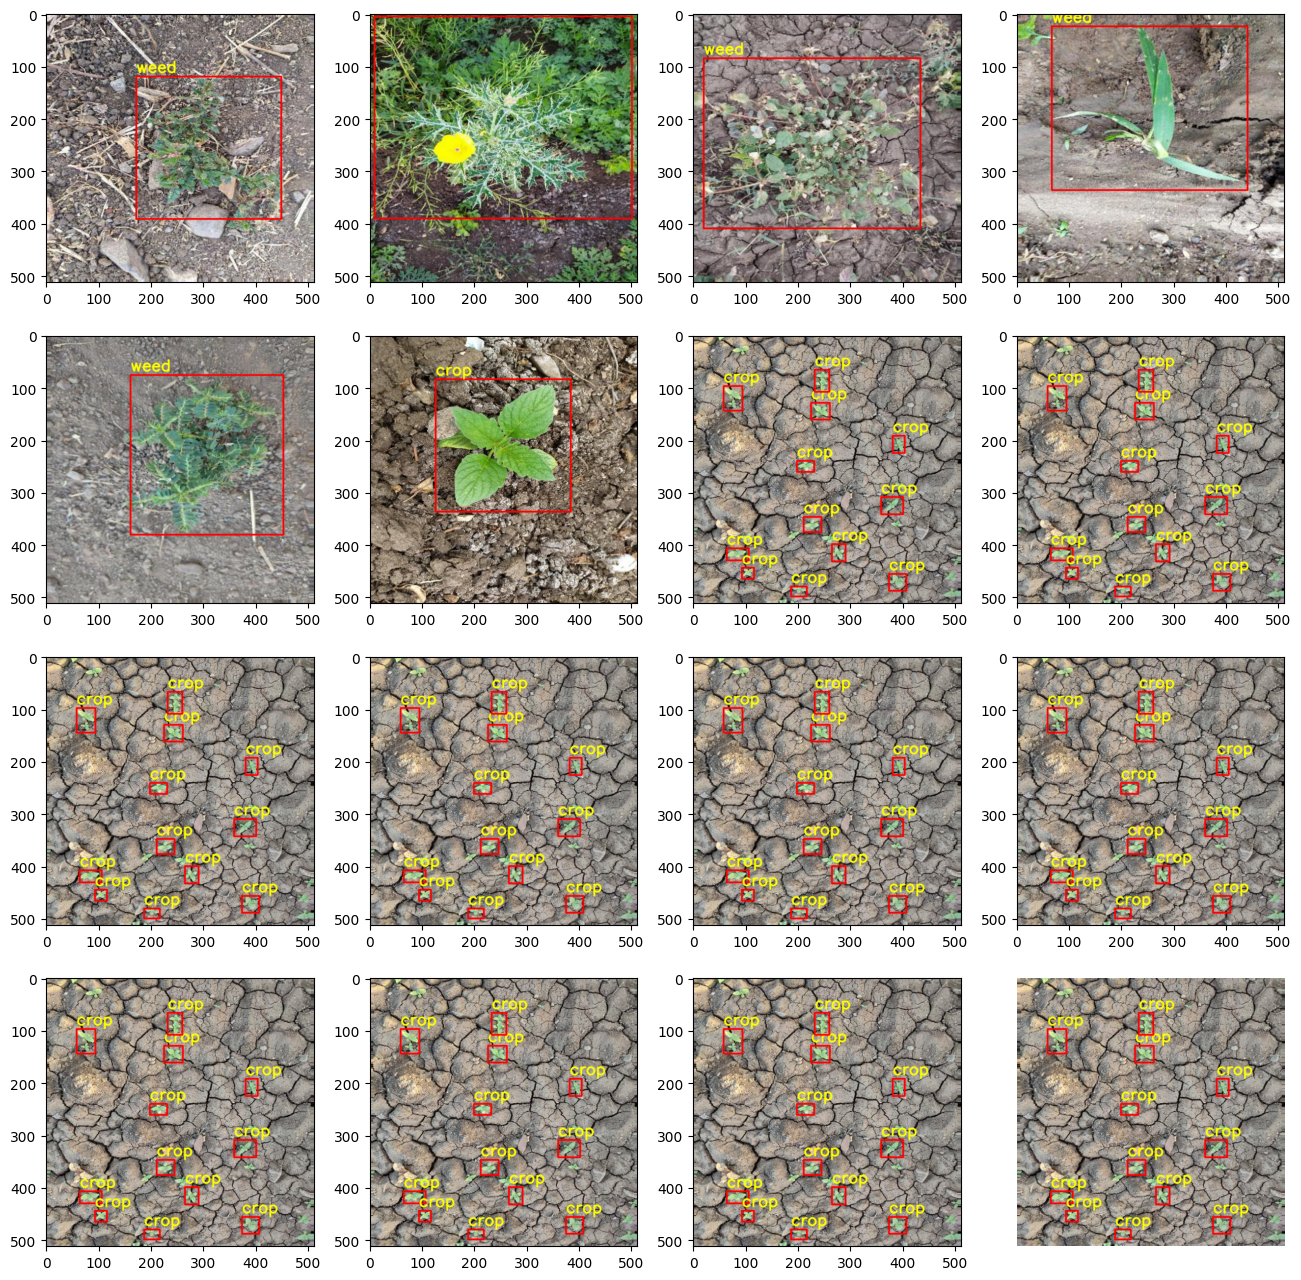

In [21]:
# _ , axes = plt.subplots(46,46,figsize=(100,100))
# for i,ax in tqdm(zip(range(2072),axes.flat)):
_ , axes = plt.subplots(4,4,figsize=(16,16))
for i,ax in tqdm(zip(range(16),axes.flat)):
    temp_df = df[df['filename']==pascal_voc.loc[i,'filename']].reset_index(drop=True)
    image_path = os.path.join(path, pascal_voc.loc[i, 'filename'])
    img = cv2.imread(image_path)
    # temp_img = cv2.imread(path+folder_images[i])
    temp_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for j in range(len(temp_df)):
        rect = cv2.rectangle(temp_img,(temp_df.loc[j,'xmin'],temp_df.loc[j,'ymin']),(temp_df.loc[j,'xmax'],temp_df.loc[j,'ymax']),(255,0,0),2,cv2.LINE_AA)
        rect_text = cv2.putText(rect,temp_df.loc[j,'name'],(temp_df.loc[j,'xmin'],temp_df.loc[j,'ymin']-8), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    ax.imshow(rect_text)
    plt.axis('off')

In [22]:
df.shape

(2072, 12)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2072 non-null   object
 1   width     2072 non-null   int64 
 2   height    2072 non-null   int64 
 3   x_cen     2072 non-null   int64 
 4   y_cen     2072 non-null   int64 
 5   name      2072 non-null   object
 6   xmin      2072 non-null   int64 
 7   ymin      2072 non-null   int64 
 8   xmax      2072 non-null   int64 
 9   ymax      2072 non-null   int64 
 10  w         2072 non-null   int64 
 11  h         2072 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 194.4+ KB


In [24]:
# print(df['name'].value_counts())
print(len(df['filename'].unique()))

1300


In [25]:
# # Group by filename and sample 80% of the groups for training
# train_groups = df.groupby('filename').sample(frac=0.7, random_state=42)


# # Create the test set from the remaining groups
# df_train = train_groups
# df_test = df[~df.index.isin(train_groups.index)]


In [26]:
# print(f"Training set size: {len(df_train)}")
# print(f"Testing set size: {len(df_test)}")


In [27]:
img_df= pd.DataFrame(df, columns = ['filename'])
img_train= tuple(img_df.sample(frac=0.8)['filename'])

In [28]:
img_test = tuple(img_df.query(f'filename not in {img_train}')['filename'])

In [29]:
len(img_train)

1658

In [30]:
len(img_test)

216

In [31]:
train_df= df.query(f'filename in {img_train}')
test_df= df.query(f'filename in {img_test}')

In [32]:
train_df

,filename,width,height,x_cen,y_cen,name,xmin,ymin,xmax,ymax,w,h
1,agri_0_1017.jpeg,512,512,254,197,weed,8,4,500,390,492,385
2,agri_0_1018.jpeg,512,512,227,247,weed,20,84,434,409,414,325
3,agri_0_1020.jpeg,512,512,253,179,weed,66,23,440,336,374,312
4,agri_0_1024.jpeg,512,512,307,229,weed,161,76,453,381,291,304
5,agri_0_1026.jpeg,512,512,254,210,crop,125,84,383,337,257,253
...,...,...,...,...,...,...,...,...,...,...,...,...
2067,agri_0_9963.jpeg,512,512,256,208,weed,58,80,455,336,396,256
2068,agri_0_9971.jpeg,512,512,136,222,weed,45,132,228,311,183,178
2069,agri_0_9971.jpeg,512,512,139,433,weed,52,355,227,512,175,157
2070,agri_0_9971.jpeg,512,512,365,195,weed,272,80,458,310,186,230


In [33]:
test_df.head()

,filename,width,height,x_cen,y_cen,name,xmin,ymin,xmax,ymax,w,h
0,agri_0_1009.jpeg,512,512,311,255,weed,172,119,449,391,277,272
25,agri_0_1079.jpeg,512,512,254,252,weed,6,4,501,500,495,496
37,agri_0_1114.jpeg,512,512,244,233,weed,25,14,463,452,437,438
48,agri_0_1166.jpeg,512,512,266,270,weed,53,110,480,429,426,319
52,agri_0_1174.jpeg,512,512,248,244,crop,0,0,496,488,496,487


Label Encoding

In [34]:
def label_encoding(x):
    labels={'crop':0, 'weed':1}
    return labels[x]

In [35]:
train_df['id']= train_df['name'].apply(label_encoding)

C:\Users\CC\AppData\Local\Temp\ipykernel_9448\2900753500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['id']= train_df['name'].apply(label_encoding)


In [36]:
test_df['id']= test_df['name'].apply(label_encoding)

C:\Users\CC\AppData\Local\Temp\ipykernel_9448\2483525404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['id']= test_df['name'].apply(label_encoding)


In [37]:
train_df.head()

,filename,width,height,x_cen,y_cen,name,xmin,ymin,xmax,ymax,w,h,id
1,agri_0_1017.jpeg,512,512,254,197,weed,8,4,500,390,492,385,1
2,agri_0_1018.jpeg,512,512,227,247,weed,20,84,434,409,414,325,1
3,agri_0_1020.jpeg,512,512,253,179,weed,66,23,440,336,374,312,1
4,agri_0_1024.jpeg,512,512,307,229,weed,161,76,453,381,291,304,1
5,agri_0_1026.jpeg,512,512,254,210,crop,125,84,383,337,257,253,0


Save Images and Labels in Text

In [38]:
import os 
from shutil import move

In [39]:
train_folder= 'data/train'
test_folder= 'data/test'

os.mkdir(train_folder)
os.mkdir(test_folder)

In [40]:
cols= ['filename', 'id', 'x_cen', 'y_cen', 'w', 'h']	
groupby_obj_train= train_df[cols].groupby('filename')
groupby_obj_test= test_df[cols].groupby('filename')

In [62]:
# groupby_obj_train.get_group('agri_0_9971.jpeg').set_index('filename').to_csv('sample.txt', index=False, header = False)
# save each image in train/test folder and respective Labels in .txt
def save_data(filename, folder_path, group_obj):
    #move image
    src= os.path.join('data', filename)
    dst = os.path.join(folder_path, filename)
    move(src, dst) #move image to the destination folder

    #save the labels
    label_filename = os.path.splitext(filename)[0] + '.txt'
    src_label = os.path.join('data', label_filename)
    dst_label = os.path.join(folder_path, label_filename)

    # Move the label file if it exists
    if os.path.exists(src_label):
        move(src_label, dst_label)  # Move label file

    

In [63]:
groupby_obj_train.groups

{'agri_0_1017.jpeg': [1], 'agri_0_1018.jpeg': [2], 'agri_0_1020.jpeg': [3], 'agri_0_1024.jpeg': [4], 'agri_0_1026.jpeg': [5], 'agri_0_1028.jpeg': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'agri_0_1041.jpeg': [18], 'agri_0_1053.jpeg': [19], 'agri_0_106.jpeg': [20, 21, 22, 23], 'agri_0_1068.jpeg': [24], 'agri_0_1082.jpeg': [26, 27], 'agri_0_1083.jpeg': [28], 'agri_0_1094.jpeg': [29], 'agri_0_1095.jpeg': [30], 'agri_0_110.jpeg': [31, 32, 33, 34, 35, 36], 'agri_0_1119.jpeg': [38], 'agri_0_1123.jpeg': [39], 'agri_0_1129.jpeg': [40], 'agri_0_113.jpeg': [41], 'agri_0_1130.jpeg': [42, 43], 'agri_0_114.jpeg': [44], 'agri_0_1140.jpeg': [45, 46], 'agri_0_1146.jpeg': [47], 'agri_0_1168.jpeg': [49], 'agri_0_1171.jpeg': [50], 'agri_0_1173.jpeg': [51], 'agri_0_1177.jpeg': [53], 'agri_0_1192.jpeg': [54, 55], 'agri_0_1193.jpeg': [56], 'agri_0_1210.jpeg': [58], 'agri_0_1211.jpeg': [59], 'agri_0_1214.jpeg': [60], 'agri_0_1215.jpeg': [61], 'agri_0_122.jpeg': [62], 'agri_0_1221.jpeg': [63], 'agri_0_125

In [64]:
groupby_obj_train.groups.keys()

dict_keys(['agri_0_1017.jpeg', 'agri_0_1018.jpeg', 'agri_0_1020.jpeg', 'agri_0_1024.jpeg', 'agri_0_1026.jpeg', 'agri_0_1028.jpeg', 'agri_0_1041.jpeg', 'agri_0_1053.jpeg', 'agri_0_106.jpeg', 'agri_0_1068.jpeg', 'agri_0_1082.jpeg', 'agri_0_1083.jpeg', 'agri_0_1094.jpeg', 'agri_0_1095.jpeg', 'agri_0_110.jpeg', 'agri_0_1119.jpeg', 'agri_0_1123.jpeg', 'agri_0_1129.jpeg', 'agri_0_113.jpeg', 'agri_0_1130.jpeg', 'agri_0_114.jpeg', 'agri_0_1140.jpeg', 'agri_0_1146.jpeg', 'agri_0_1168.jpeg', 'agri_0_1171.jpeg', 'agri_0_1173.jpeg', 'agri_0_1177.jpeg', 'agri_0_1192.jpeg', 'agri_0_1193.jpeg', 'agri_0_1210.jpeg', 'agri_0_1211.jpeg', 'agri_0_1214.jpeg', 'agri_0_1215.jpeg', 'agri_0_122.jpeg', 'agri_0_1221.jpeg', 'agri_0_1258.jpeg', 'agri_0_1260.jpeg', 'agri_0_129.jpeg', 'agri_0_131.jpeg', 'agri_0_1314.jpeg', 'agri_0_1317.jpeg', 'agri_0_1320.jpeg', 'agri_0_1332.jpeg', 'agri_0_1334.jpeg', 'agri_0_1350.jpeg', 'agri_0_1351.jpeg', 'agri_0_136.jpeg', 'agri_0_1361.jpeg', 'agri_0_1393.jpeg', 'agri_0_14.jpeg',

In [65]:
filename_series = pd.Series(groupby_obj_train.groups.keys())

In [66]:
filename_series

0       agri_0_1017.jpeg
1       agri_0_1018.jpeg
2       agri_0_1020.jpeg
3       agri_0_1024.jpeg
4       agri_0_1026.jpeg
              ...       
1081    agri_0_9927.jpeg
1082    agri_0_9933.jpeg
1083    agri_0_9960.jpeg
1084    agri_0_9963.jpeg
1085    agri_0_9971.jpeg
Length: 1086, dtype: object

In [68]:
filename_series.apply(save_data, args= (train_folder, groupby_obj_train))

0       None
1       None
2       None
3       None
4       None
        ... 
1081    None
1082    None
1083    None
1084    None
1085    None
Length: 1086, dtype: object

In [69]:
filename_series_test = pd.Series(groupby_obj_test.groups.keys())

In [70]:
filename_series_test.apply(save_data, args=(test_folder, groupby_obj_test))

0      None
1      None
2      None
3      None
4      None
       ... 
209    None
210    None
211    None
212    None
213    None
Length: 214, dtype: object